In [32]:
import pandas as pd
import numpy as np

df=pd.DataFrame(pd.read_csv('products.csv'))
df.head()

,id,title,group,salesrank,review_cnt,downloads,rating
0,1,Patterns of Preaching: A Sermon Sampler,Book,396585.0,2,2,5.0
1,2,Candlemas: Feast of Flames,Book,168596.0,12,12,4.5
2,3,World War II Allied Fighter Planes Trading Cards,Book,1270652.0,1,1,5.0
3,4,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289.0,1,1,4.0
4,5,Prayers That Avail Much for Business: Executive,Book,455160.0,0,0,0.0


In [33]:
df_filter=df[(df['group']=='Book')&((df['salesrank']<=150000)&(df['salesrank']>-1))]

df_cop=pd.DataFrame(pd.read_csv('copurchase.csv'))
df_cop_book=df_cop[df_cop.Source.isin(df_filter.id) & df_cop.Target.isin(df_filter.id)]
in_degree=df_cop_book.groupby(['Target'])['Source'].size().reset_index(name='in_degree')
out_degree=df_cop_book.groupby(['Source'])['Target'].size().reset_index(name='out_degree')

x = out_degree.set_index('Source')
y = in_degree.set_index('Target').rename_axis('Source')
y.columns = x.columns

combined=y.add(x, fill_value=0).loc[y.index, :].reset_index()
df_filter.head()
combined.nlargest(5,'out_degree') #Top 5 products with highest in+out degree
#2 products (33 and 4429) with highest degree.

,Source,out_degree
1,33,53.0
360,4429,53.0
23,244,36.0
32,302,22.0
471,5913,22.0


In [34]:
#grouping by source and target products to see if any particular combination has been repeated. 
#We'll use this dataset to build the network graph
df_final_group=df_cop_book.groupby(['Source','Target']).size().reset_index(name='Freq')
df_final_group.head()

,Source,Target,Freq
0,12,261,1
1,74,282,1
2,77,422,1
3,79,82,1
4,117,131,1


The product with the highest degree (in degree + out degree) are 33 and 4429. We’re interested in the sub component off all the products that are directly or indirectly associated with products 33 and 4429. The nodes 33 and 4429 and all its subcomponents were visualized by using a package Networkx. In the graph, larger the size of node, larger the degree for the node and darker color means larger degree. The degree of all nodes varies from 1-53. (A clear picture is attached with the assignment).

In [35]:
import networkx as nx

In [36]:
nx.__version__

'3.1'

In [37]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
from matplotlib.pyplot import subplots

#### Statistics from the graph:
**Degree of the Nodes:**<br/>  We can see that the large number of nodes have lower degree (<10) while only few nodes have degree >10.

In [38]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
import community
from matplotlib.pyplot import subplots
%matplotlib inline

g = nx.from_pandas_edgelist(df_final_group, 'Source', 'Target', ['Freq'])#create_using=nx.Graph()

# fig, ax = subplots()
subnet = nx.node_connected_component(g, 4429)



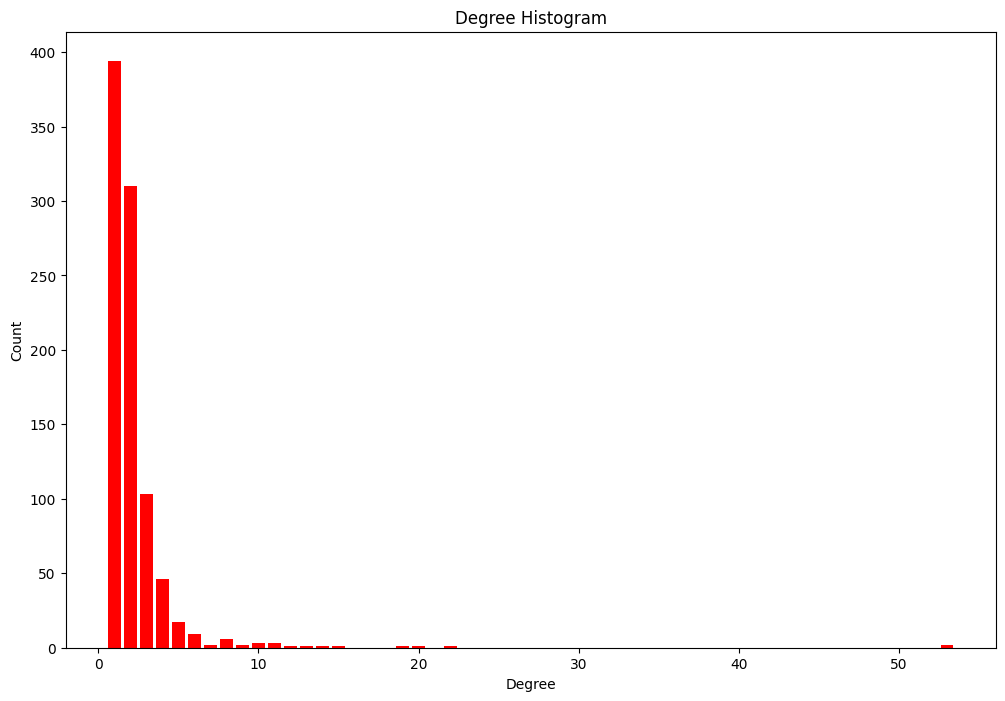

In [39]:
## Degree Histogram for sub-component
import collections
from bokeh.io import show, output_file
from bokeh.plotting import figure
import seaborn as sns
degree_sequence = sorted([d for n, d in g.subgraph(subnet).degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.8, color='r')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [40]:
#Density of sub-component
density_sc=nx.density(g.subgraph(subnet))
density_sc
#Low value of density means less dense the nodes are and little collectiveness between the nodes. 

0.0024622938288301533

#### Degree Centrality of the Nodes:

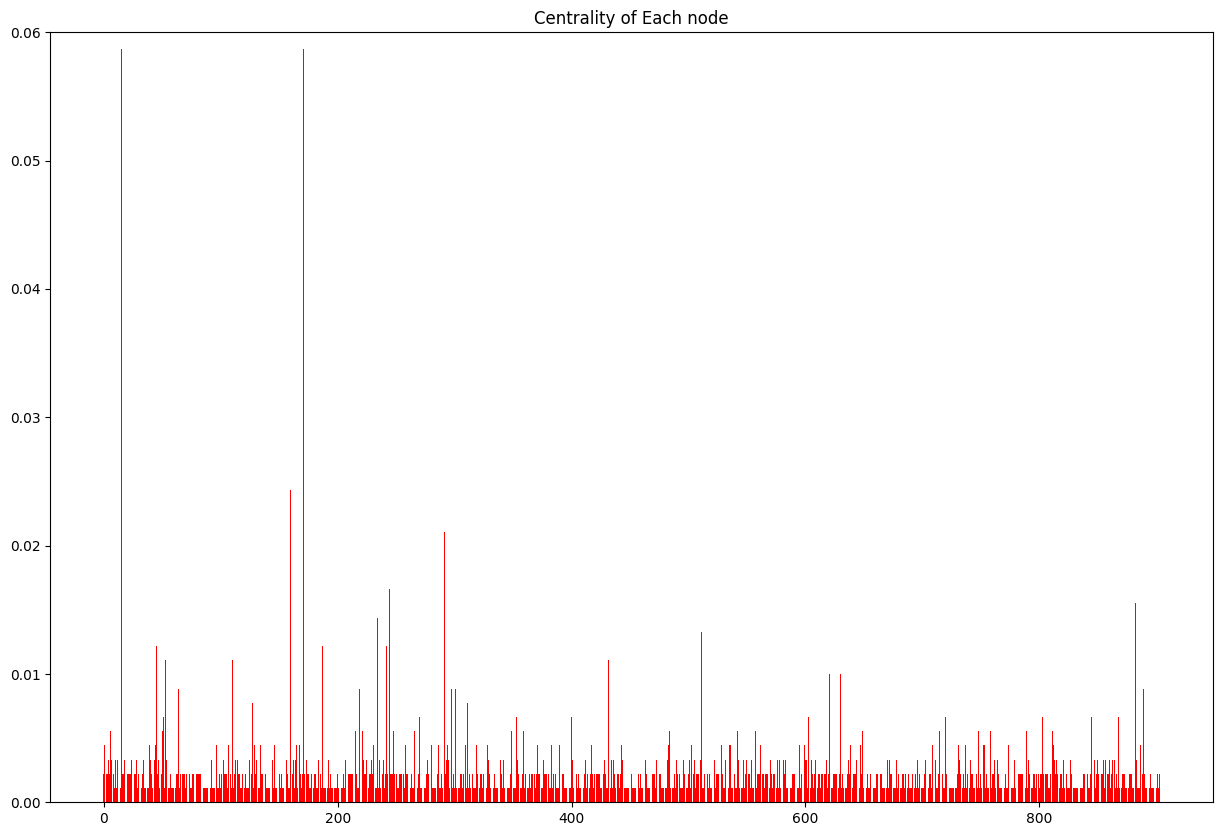

In [41]:
#Centrality of the Nodes.
degree_central=nx.degree_centrality(g.subgraph(subnet))
plt.bar(range(len(degree_central)), list(degree_central.values()),width=0.8, color='r')
# plt.xticks(range(len(degree_central)), list(degree_central.keys()))
fig = plt.gcf()
axes=plt.gca()
fig.set_size_inches(15,10)
axes.set_ylim([0,0.06])
plt.title("Centrality of Each node")
plt.show()
#degree centrality=fraction of nodes it is connected to. 2 nodes have highest centrality

#### Closeness Centrality:
Closeness centrality is defined by is the average length of the shortest path between the node and all other nodes in the graph. Thus the more central a node is, the closer it is to all other nodes. For this particular subgraph, the closeness centrality looks similar for most of the nodes.

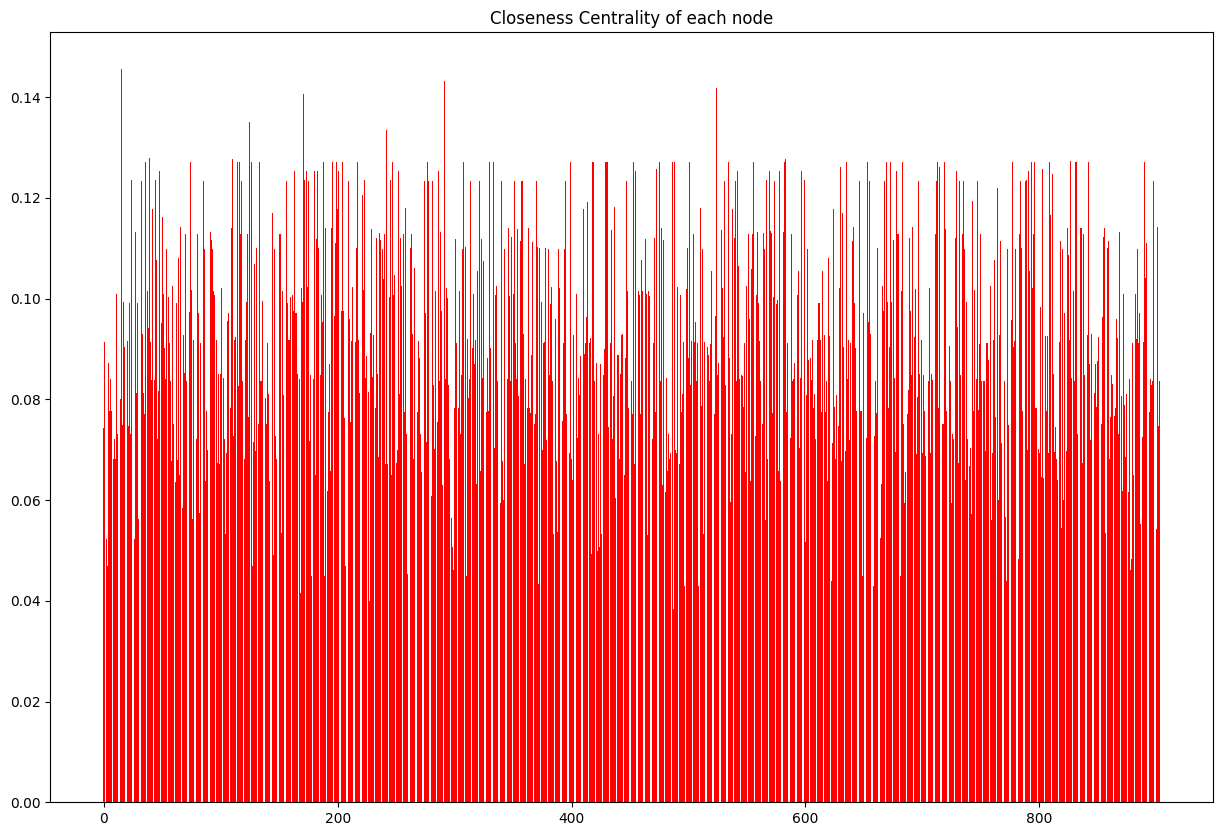

In [42]:
#Closeness Centrality of the Nodes.
close_degree_central=nx.closeness_centrality(g.subgraph(subnet))
plt.bar(range(len(close_degree_central)), list(close_degree_central.values()),width=0.8, color='r')
# plt.xticks(range(len(degree_central)), list(degree_central.keys()))
fig = plt.gcf()
axes=plt.gca()
fig.set_size_inches(15,10)
plt.title("Closeness Centrality of each node")
plt.show()
#Closeness Centrality-Closeness centrality of a node u is the reciprocal of the
#average shortest path distance to u over all n-1 reachable nodes.

#### Betweenness Centrality:
Betweenness centrality aims to find the vertex of the given graph. Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass- through v. In the below graph, we can see that few nodes act as the bridge for other nodes to be connected.

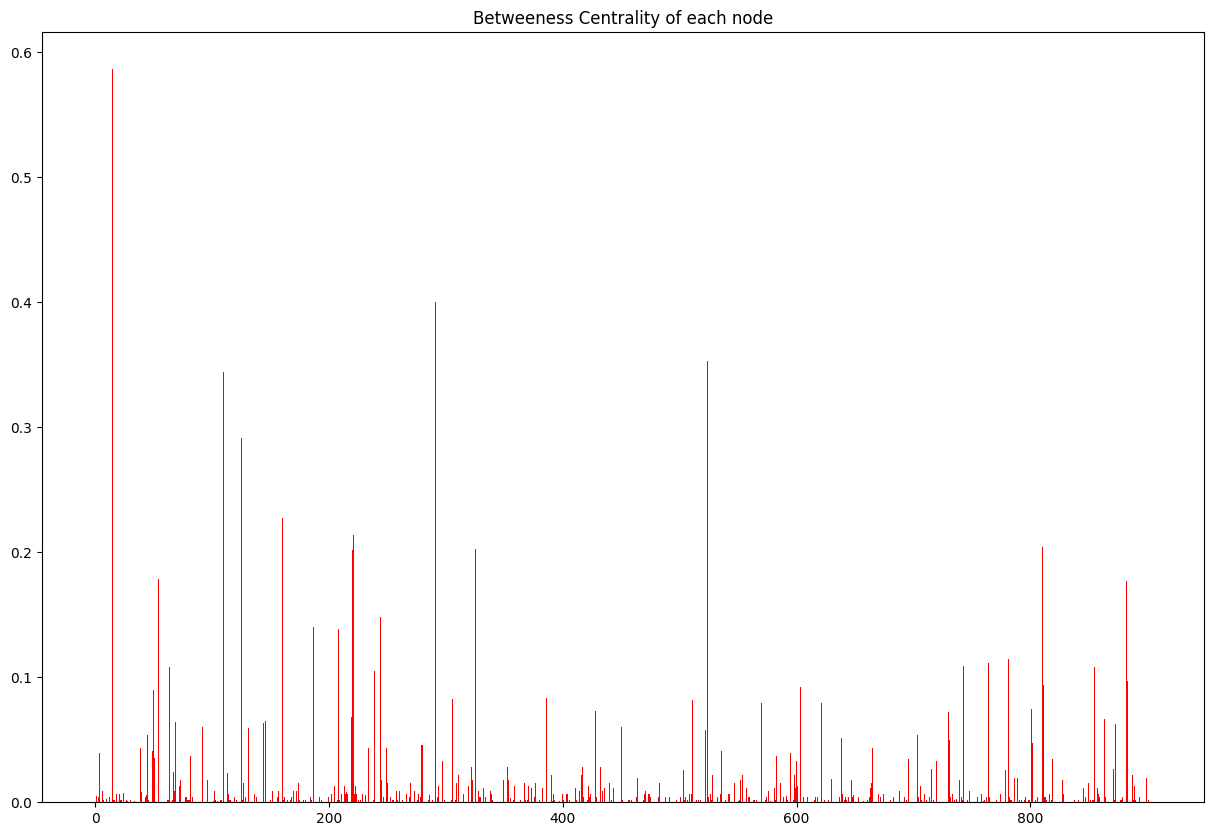

In [43]:
#Between Centrality of the Nodes.
between_degree_central=nx.betweenness_centrality(g.subgraph(subnet))
plt.bar(range(len(between_degree_central)), list(between_degree_central.values()),width=0.8, color='r')
fig = plt.gcf()
axes=plt.gca()
fig.set_size_inches(15,10)
plt.title("Betweeness Centrality of each node")
plt.show()
#Between Centrality-Compute the shortest-path betweenness centrality for nodes.
#Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v

#### Eigen Vector Centrality:
Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. It is a relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. In the subgraph, 2 nodes have high eigen vector score. Many other nodes have same score of 0.1, indicating that those nodes have similar in value.

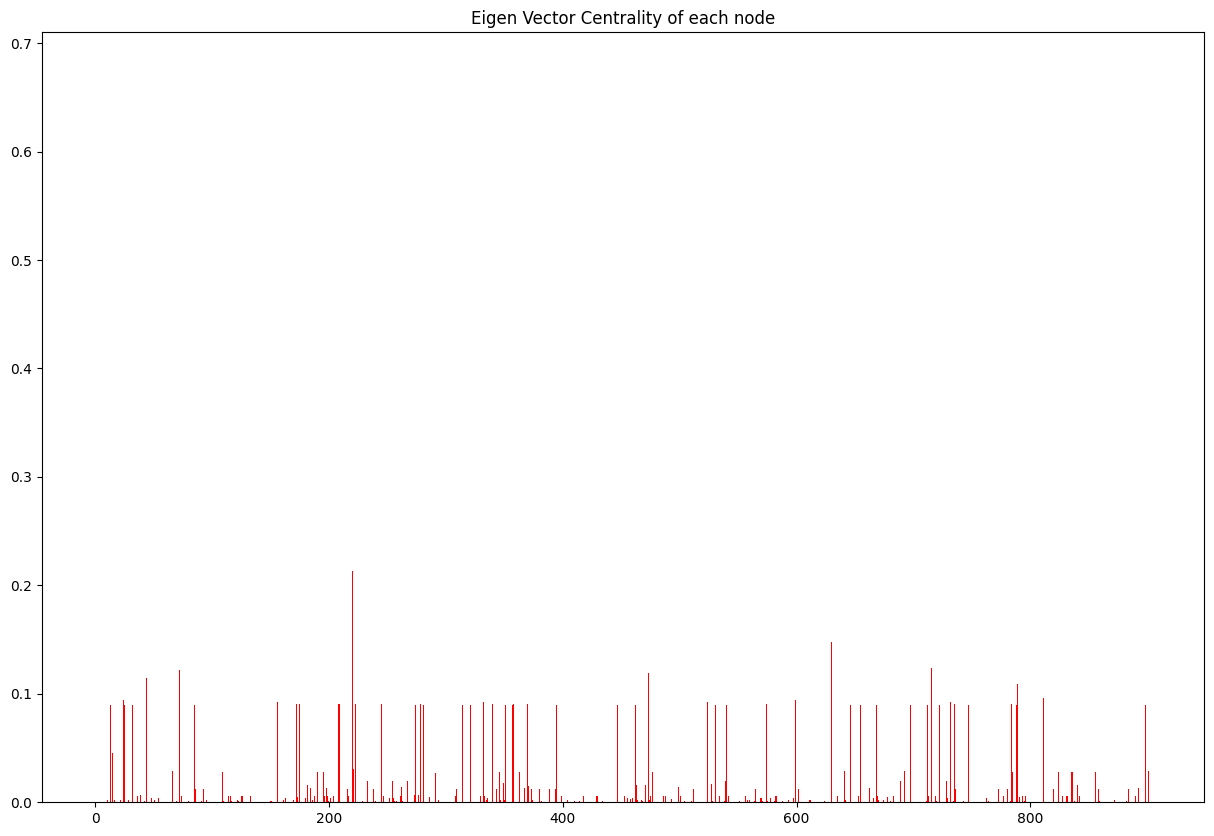

In [44]:
#Eigen Value Centrality of the Nodes.
Eigen_central=nx.eigenvector_centrality_numpy(g.subgraph(subnet))
plt.bar(range(len(Eigen_central)), list(Eigen_central.values()),width=0.8, color='r')
fig = plt.gcf()
axes=plt.gca()
fig.set_size_inches(15,10)
plt.title("Eigen Vector Centrality of each node")
plt.show()
#Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. 
#The eigenvector centrality for node i is the i-th element of the vector xdefined by the equation

#### Hub and Authority Score:
Hub score estimates the nodes value based on outgoing links. The authority score indicates the node value based on incoming links. The hub score and Authority score of the subgraph is same for all nodes, indicating that the no of incoming and outgoing nodes are same.

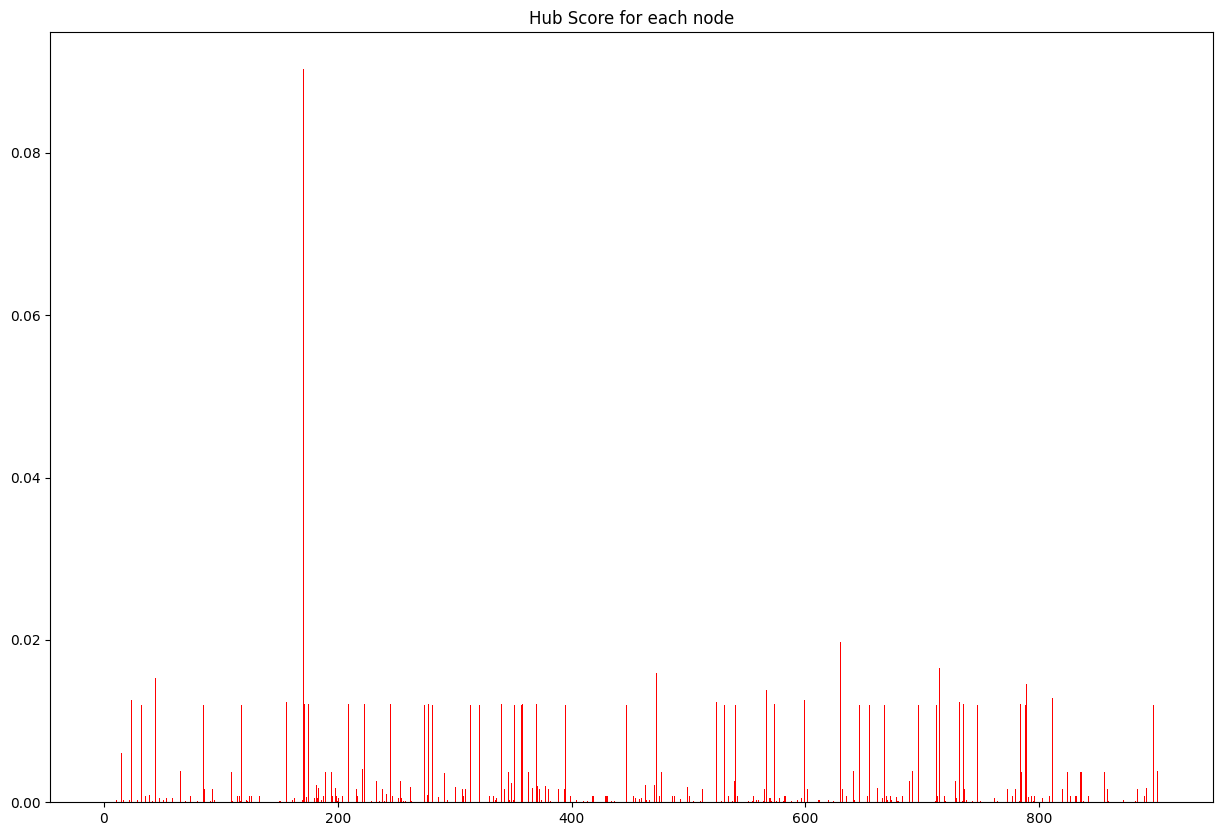

In [45]:
#Hub Score of the Nodes.
hits_score=nx.hits(g.subgraph(subnet))
plt.bar(range(len(hits_score[0])), list(hits_score[0].values()),width=0.8, color='r')
fig = plt.gcf()
axes=plt.gca()
fig.set_size_inches(15,10)
plt.title("Hub Score for each node")
plt.show()
#Hub estimates the node value based on the Outgoing links.

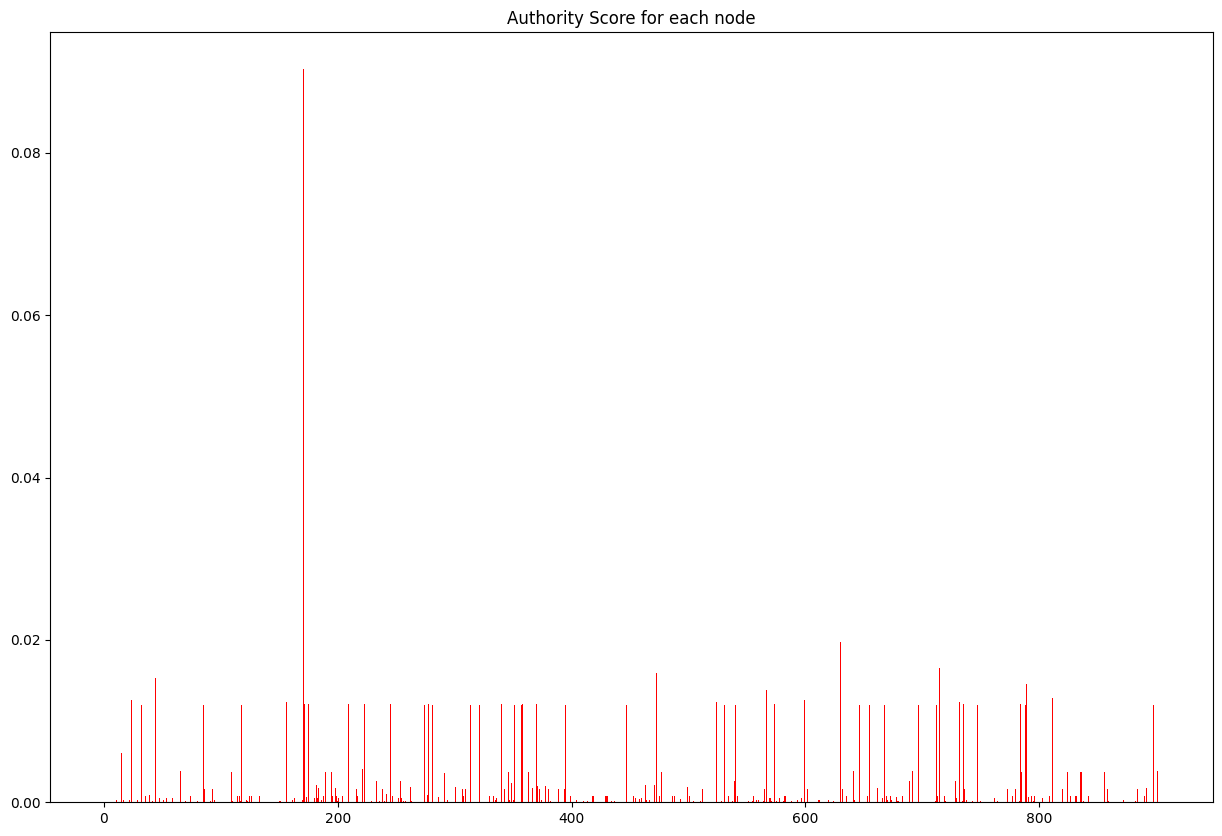

In [46]:
#Authority Score of the Nodes.
hits_score=nx.hits(g.subgraph(subnet))
plt.bar(range(len(hits_score[1])), list(hits_score[1].values()),width=0.8, color='r')
fig = plt.gcf()
axes=plt.gca()
fig.set_size_inches(15,10)
plt.title("Authority Score for each node")
plt.show()
#Authorities estimates the node value based on the incoming links.

#### Average Degree Neighbor:
Average degree of neighbor indicates the average degree of the neighbor for a given node. This gives us a good indication of the degree of the neighboring nodes for a given node. In the below graph, we can see that nodes only connected to 33 or 4429 directly have average degree 53 but the dispersion of the average degree is high.

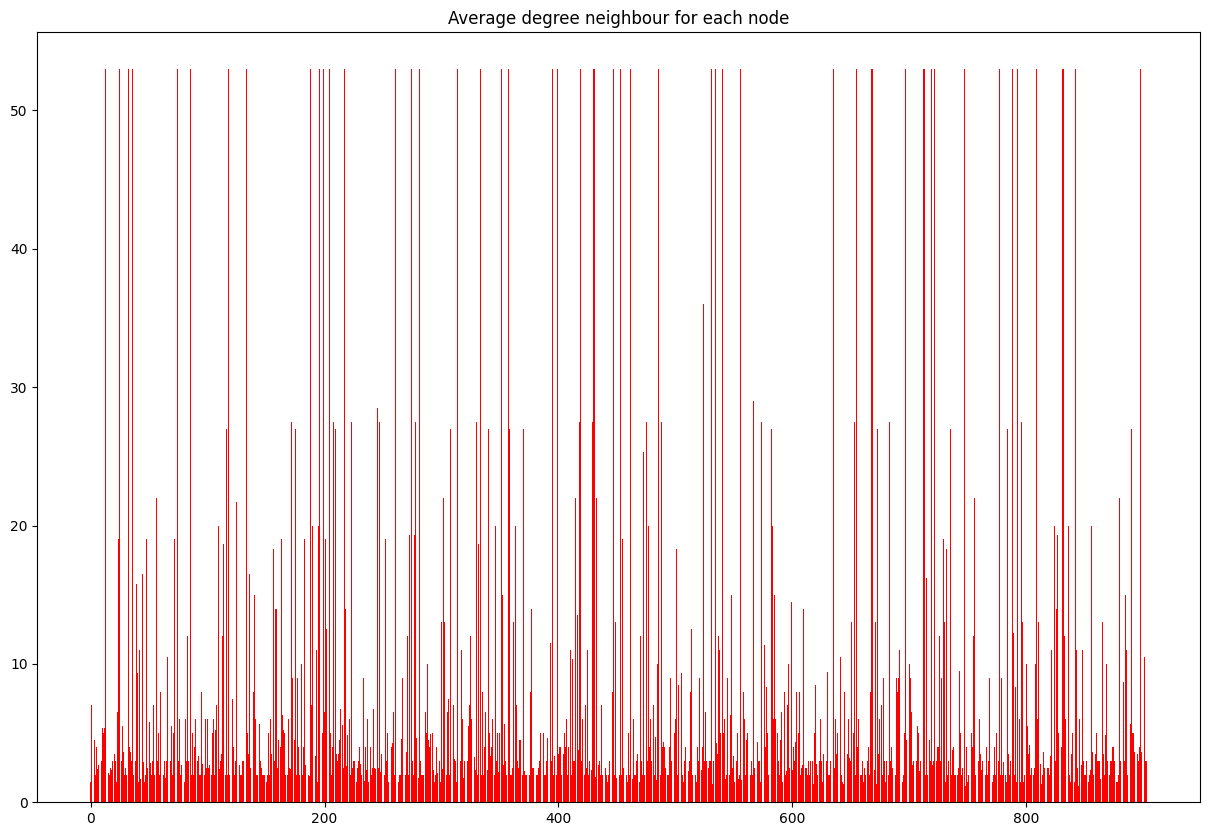

In [47]:
#Average Degree Neighbour
degree_assort=nx.average_neighbor_degree(g.subgraph(subnet))
plt.bar(range(len(degree_assort)), list(degree_assort.values()),width=0.8, color='r')
fig = plt.gcf()
axes=plt.gca()
fig.set_size_inches(15,10)
plt.title("Average degree neighbour for each node")
plt.show()
#Returns the average degree of the neighborhood of each node.

#### Diameter of Network:
The shortest distance/path length between the two most distant connected nodes in the network (the
longest of all the calculated path lengths). In the subgraph, the diameter is 41.


In [48]:
#Diameter of the network graph
nx.diameter(g.subgraph(subnet))
#The shortest distance/path length between the two most distant connected nodes in the 
#network ( = the longest of all the calculated path lengths).

41

#### Average Rating, Salesrank and Review Count for the nodes:
We calculated overall average for Rating, Salesrank and Review Count for the subgraph.


In [49]:
filter_4429=df_final_group[(df_final_group['Source']==4429)|(df_final_group['Target']==4429)]
merged=pd.merge(filter_4429,df_filter,how='left', left_on=['Source'],right_on=['id'])
merged.loc[merged.id==4429,'title']='The Narcissistic Family : Diagnosis and Treatment'
merged.loc[merged.id==4429,'salesrank']=9727
merged.loc[merged.id==4429,'review_cnt']=19
merged.loc[merged.id==4429,'downloads']=19
merged.loc[merged.id==4429,'rating']=5.0
merged.loc[merged.id==4429,'id']=2501
merged[['rating','salesrank','review_cnt']].mean()

rating            3.632075
salesrank     75080.471698
review_cnt       22.037736
dtype: float64

In [50]:
#Get the edges for each nodes from the network graph and store them in edges dataframe. From the initial table,
# we get the salesrank, rating and review detail for all the products. 
h=g.subgraph(subnet)
edges=pd.DataFrame(list(h.edges()))
edges=edges.rename(columns={'0':'Source','1':'Target'})

#total salesrank
df_cop_sales=pd.merge(edges,df_filter[['id','salesrank']],left_on=1,right_on='id',how='left')
df_cop_sales=df_cop_sales.rename(columns={'salesrank':'salesrank_target'})

df_cop_sale=pd.merge(edges,df_filter[['id','salesrank']],left_on=0,right_on='id',how='left')
df_cop_sale=df_cop_sale.rename(columns={'salesrank':'salesrank_source'})

df_cop_sale['salesrank_target']=df_cop_sales['salesrank_target']
df_source_sum=df_cop_sale.groupby(0)['salesrank_target'].sum().reset_index(name='Source_sum')
df_target_sum=df_cop_sale.groupby(1)['salesrank_source'].sum().reset_index(name='Target_sum')

x = df_source_sum.set_index(0)
y = df_target_sum.set_index(1).rename_axis(0)
y.columns = x.columns

combined=y.add(x, fill_value=0)
combined=pd.DataFrame(combined)
combined=combined.rename(columns={'0':'id','Source_sum':'Total_salesrank'})
combined.head()

,Total_salesrank
0,
33,4354123.0
77,125232.0
78,804969.0
130,159895.0
148,60293.0


In [51]:
#Total rating
df_cop_rating=pd.merge(edges,df_filter[['id','rating']],left_on=1,right_on='id',how='left')
df_cop_rating=df_cop_rating.rename(columns={'rating':'rating_target'})

df_cop_rate=pd.merge(edges,df_filter[['id','rating']],left_on=0,right_on='id',how='left')
df_cop_rate=df_cop_rate.rename(columns={'rating':'rating_source'})
df_cop_rate['rating_target']=df_cop_rating['rating_target']

df_source_rate_sum=df_cop_rate.groupby(0)['rating_target'].sum().reset_index(name='Source_sum')
df_target_rate_sum=df_cop_rate.groupby(1)['rating_source'].sum().reset_index(name='Target_sum')

x = df_source_rate_sum.set_index(0)
y = df_target_rate_sum.set_index(1).rename_axis(0)
y.columns = x.columns

combined_rating=y.add(x, fill_value=0)
combined_rating=pd.DataFrame(combined_rating)
combined_rating=combined_rating.rename(columns={'0':'id','Source_sum':'Total_rating'})
combined_rating.head()

,Total_rating
0,
33,217.5
77,14.0
78,49.5
130,9.0
148,4.5


In [52]:
#Total review count
df_cop_reviews=pd.merge(edges,df_filter[['id','review_cnt']],left_on=1,right_on='id',how='left')
df_cop_reviews=df_cop_reviews.rename(columns={'review_cnt':'review_cnt_target'})

df_cop_review=pd.merge(edges,df_filter[['id','review_cnt']],left_on=0,right_on='id',how='left')
df_cop_review=df_cop_review.rename(columns={'review_cnt':'review_cnt_source'})
df_cop_review['review_cnt_target']=df_cop_reviews['review_cnt_target']

df_source_review_sum=df_cop_review.groupby(0)['review_cnt_target'].sum().reset_index(name='Source_sum')
df_source_reviews_sum=df_cop_review.groupby(1)['review_cnt_source'].sum().reset_index(name='Target_sum')

x = df_source_review_sum.set_index(0)
y = df_source_reviews_sum.set_index(1).rename_axis(0)
y.columns = x.columns

combined_reviews=y.add(x, fill_value=0)
combined_reviews=pd.DataFrame(combined_reviews)
combined_reviews=combined_reviews.rename(columns={'0':'id','Source_sum':'Total_review_cnt'})
combined_reviews.head()

,Total_review_cnt
0,
33,1117.0
77,12.0
78,1736.0
130,9.0
148,14.0


#### Average salesrank, rating and review count: 


In [53]:
degrees=pd.DataFrame(list(h.degree()))
degrees=degrees.sort_values(0)
degrees.head()

,0,1
15,33,53
47,77,3
45,78,11
73,130,2
83,148,2


In [54]:
df_merge_sales=pd.merge(combined,degrees,left_on=0,right_on=0,how='left')
df_merge_sales['Average_Salesrank']=df_merge_sales['Total_salesrank']/df_merge_sales[1]
df_merge_sales=df_merge_sales.rename(columns={'key_0':'id',1:'Degree'})
df_merge_sales.head()

,id,Total_salesrank,Degree,Average_Salesrank
0,33,4354123.0,53,82153.264151
1,77,125232.0,3,41744.000000
2,78,804969.0,11,73179.000000
3,130,159895.0,2,79947.500000
4,148,60293.0,2,30146.500000


In [55]:
df_merge_rating=pd.merge(combined_rating,degrees,left_on=0,right_on=0,how='left')
df_merge_rating['Average_Rating']=df_merge_rating['Total_rating']/df_merge_rating[1]
df_merge_rating=df_merge_rating.rename(columns={'key_0':'id',1:'Degree'})
df_merge_rating.head()

,id,Total_rating,Degree,Average_Rating
0,33,217.5,53,4.103774
1,77,14.0,3,4.666667
2,78,49.5,11,4.500000
3,130,9.0,2,4.500000
4,148,4.5,2,2.250000


In [56]:
df_merge_reviews=pd.merge(combined_reviews,degrees,left_on=0,right_on=0,how='left')
df_merge_reviews['Average_Reviews']=df_merge_reviews['Total_review_cnt']/df_merge_reviews[1]
df_merge_reviews=df_merge_reviews.rename(columns={'key_0':'id',1:'Degree'})
df_merge_reviews.head()

,id,Total_review_cnt,Degree,Average_Reviews
0,33,1117.0,53,21.075472
1,77,12.0,3,4.000000
2,78,1736.0,11,157.818182
3,130,9.0,2,4.500000
4,148,14.0,2,7.000000


#### Network Graph parameters:
From the network graph, we're finding each parameters for each node and adding them to the dataframe.

In [57]:
centrality_df=pd.DataFrame(degree_central.items(),columns=['id','centrality'])
degree_df=pd.DataFrame(degrees.items(),columns=['id','degree'])
closeness_central_df=pd.DataFrame(close_degree_central.items(),columns=['id','closeness_centrality'])
between_degree_df=pd.DataFrame(between_degree_central.items(),columns=['id','between_centrality'])
Eigen_central_df=pd.DataFrame(Eigen_central.items(),columns=['id','eigen_centrality'])
hubs_score_df=pd.DataFrame(hits_score[0].items(),columns=['id','hub_score'])
authority_score_df=pd.DataFrame(hits_score[1].items(),columns=['id','authority_score'])
avg_degree_neighbour_df=pd.DataFrame(degree_assort.items(),columns=['id','avg_degree_neighbour'])
centrality_df.head()
#filter purchase dataset

,id,centrality
0,24578,0.002215
1,4099,0.004430
2,141316,0.002215
3,184324,0.002215
4,2057,0.003322


In [58]:
from IPython.display import display

# display centrality_df
display(centrality_df)

# display degree_df
display(degree_df)

# display closeness_central_df
display(closeness_central_df)

# display between_degree_df
display(between_degree_df)

# display Eigen_central_df
display(Eigen_central_df)

# display hubs_score_df
display(hubs_score_df)

# display authority_score_df
display(authority_score_df)

# display avg_degree_neighbour_df
display(avg_degree_neighbour_df)


,id,centrality
0,24578,0.002215
1,4099,0.004430
2,141316,0.002215
3,184324,0.002215
4,2057,0.003322
...,...,...
899,59377,0.003322
900,114676,0.001107
901,233465,0.002215
902,253947,0.001107


,id,degree
0,0,15 33 47 77 45 78 73 ...
1,1,15 53 47 3 45 11 73 2 83 ...


,id,closeness_centrality
0,24578,0.074266
1,4099,0.091332
2,141316,0.052336
3,184324,0.046955
4,2057,0.087171
...,...,...
899,59377,0.091918
900,114676,0.054221
901,233465,0.114130
902,253947,0.074677


,id,between_centrality
0,24578,0.002215
1,4099,0.004811
2,141316,0.000000
3,184324,0.004011
4,2057,0.039157
...,...,...
899,59377,0.019806
900,114676,0.000000
901,233465,0.002215
902,253947,0.000000


,id,eigen_centrality
0,24578,1.582148e-08
1,4099,4.811977e-05
2,141316,1.435582e-13
3,184324,3.945959e-14
4,2057,3.573739e-07
...,...,...
899,59377,2.876896e-04
900,114676,1.453603e-11
901,233465,2.866966e-02
902,253947,4.459363e-08


,id,hub_score
0,24578,2.113410e-09
1,4099,6.427768e-06
2,141316,1.917619e-14
3,184324,5.269073e-15
4,2057,4.773748e-08
...,...,...
899,59377,3.842915e-05
900,114676,1.941701e-12
901,233465,3.829651e-03
902,253947,5.956751e-09


,id,authority_score
0,24578,2.113410e-09
1,4099,6.427768e-06
2,141316,1.917709e-14
3,184324,5.269557e-15
4,2057,4.773748e-08
...,...,...
899,59377,3.842915e-05
900,114676,1.941700e-12
901,233465,3.829651e-03
902,253947,5.956751e-09


,id,avg_degree_neighbour
0,24578,1.500000
1,4099,7.000000
2,141316,3.000000
3,184324,4.500000
4,2057,2.000000
...,...,...
899,59377,3.666667
900,114676,2.000000
901,233465,10.500000
902,253947,3.000000
